In [102]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import random
import matplotlib.pyplot as plt

In [ ]:
def get_item(p):  # Function of generation random bits array with lenth 8
    noise = np.random.rand(8) < p
    binary_string = ''.join(str(int(b)) for b in noise)
    result_integer = int(binary_string, 2)
    return result_integer

In [ ]:
p = 0.2  # Bit error probability

data = np.array([[random.getrandbits(8), random.getrandbits(8), random.getrandbits(8), random.getrandbits(8)] for _ in range(1000000)])
noise = np.array([[get_item(p), get_item(p), get_item(p), get_item(p)] for _ in range(1000000)])
noisy_data = data ^ noise  # XOR multiplication of noise and input message

# Reshape data to fit RNN input shape (samples, timesteps, features)
data = data.reshape((1000000, 4, 1))  # 1000 samples, 3 timesteps, 1 feature
noisy_data = noisy_data.reshape((1000000, 4, 1))  # 1000 samples, 3 timesteps, 1 feature

In [42]:
# Build the RNN model
model = keras.Sequential()
model.add(layers.SimpleRNN(50, activation='sigmoid', input_shape=(4, 1)))  # RNN layer
model.add(layers.Dense(4))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(noisy_data, data, epochs=10, batch_size=64)

Epoch 1/10


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15625/15625 ━━━━━━━━━━━━━━━━━━━━ 9s 516us/step - loss: 8822.0049
Epoch 2/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 8s 525us/step - loss: 3652.7673
Epoch 3/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 8s 518us/step - loss: 3538.8176
Epoch 4/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 8s 523us/step - loss: 3530.6348
Epoch 5/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 8s 530us/step - loss: 3524.0474
Epoch 6/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 8s 539us/step - loss: 3518.1816
Epoch 7/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 8s 529us/step - loss: 3521.0369
Epoch 8/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 8s 531us/step - loss: 3528.8538
Epoch 9/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 8s 529us/step - loss: 3523.9807
Epoch 10/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 8s 532us/step - loss: 3520.6658


In [120]:
ber_ber = np.zeros(101)
for i in range(101):
    summ_bit_error = 0
    for j in range(100):
        data = np.array([random.getrandbits(8), random.getrandbits(8), random.getrandbits(8), random.getrandbits(8)]).reshape((1, 4, 1))
        noise = np.array([get_item(i/100), get_item(i/100), get_item(i/100), get_item(i/100)]).reshape((1, 4, 1))
        noisy_data = data ^ noise

        predicted = model.predict(noisy_data).reshape((1, 4, 1)).astype(int)

        errors = predicted ^ data
        summ_bit_error += sum([bin(item[0]).count('1') for item in errors[0]])
    
    ber_ber[i] = summ_bit_error


        

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

In [121]:
x = [i/100 for i in range(101)]

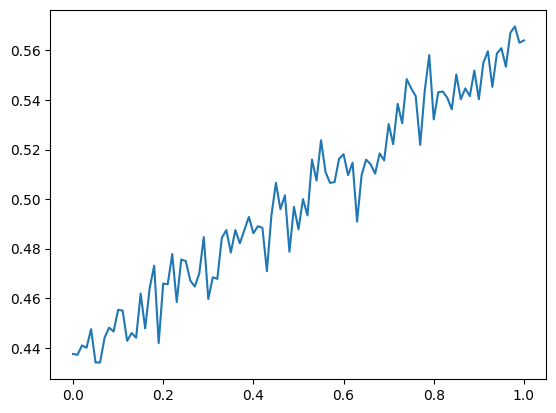

In [125]:
plt.plot(x, ber_ber/(100*32))

error 0.05

In [126]:
p = 0.05  # Bit error probability

data = np.array([[random.getrandbits(8), random.getrandbits(8), random.getrandbits(8), random.getrandbits(8)] for _ in range(1000000)])
noise = np.array([[get_item(p), get_item(p), get_item(p), get_item(p)] for _ in range(1000000)])
noisy_data = data ^ noise  # XOR multiplication of noise and input message

# Reshape data to fit RNN input shape (samples, timesteps, features)
data = data.reshape((1000000, 4, 1))  # 1000 samples, 3 timesteps, 1 feature
noisy_data = noisy_data.reshape((1000000, 4, 1))  # 1000 samples, 3 timesteps, 1 feature

In [127]:
# Build the RNN model
model1 = keras.Sequential()
model1.add(layers.SimpleRNN(50, activation='sigmoid', input_shape=(4, 1)))  # RNN layer
model1.add(layers.Dense(4))  # Output layer

# Compile the model
model1.compile(optimizer='adam', loss='mse')

# Train the model
model1.fit(noisy_data, data, epochs=10, batch_size=64)

Epoch 1/10


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15625/15625 ━━━━━━━━━━━━━━━━━━━━ 11s 646us/step - loss: 8159.4370
Epoch 2/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 9s 554us/step - loss: 1180.5587
Epoch 3/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 9s 559us/step - loss: 1073.3058
Epoch 4/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 8s 528us/step - loss: 1063.7679
Epoch 5/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 8s 521us/step - loss: 1064.1625
Epoch 6/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 8s 518us/step - loss: 1064.7363
Epoch 7/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 8s 517us/step - loss: 1058.7085
Epoch 8/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 8s 517us/step - loss: 1057.6892
Epoch 9/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 8s 526us/step - loss: 1056.9058
Epoch 10/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 8s 522us/step - loss: 1058.9656


In [128]:
ber_ber05 = np.zeros(101)
for i in range(101):
    summ_bit_error = 0
    for j in range(100):
        data = np.array([random.getrandbits(8), random.getrandbits(8), random.getrandbits(8), random.getrandbits(8)]).reshape((1, 4, 1))
        noise = np.array([get_item(i/100), get_item(i/100), get_item(i/100), get_item(i/100)]).reshape((1, 4, 1))
        noisy_data = data ^ noise

        predicted = model.predict(noisy_data).reshape((1, 4, 1)).astype(int)

        errors = predicted ^ data
        summ_bit_error += sum([bin(item[0]).count('1') for item in errors[0]])
    
    ber_ber05[i] = summ_bit_error

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

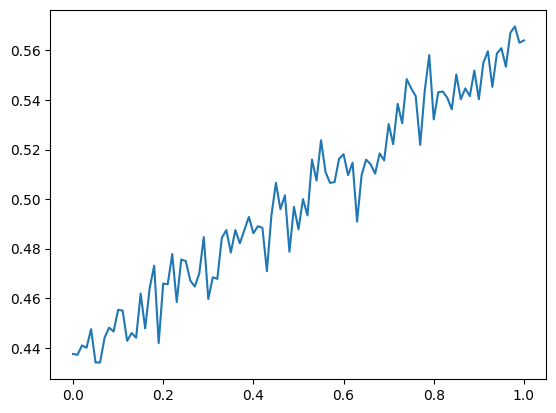

In [129]:
plt.plot(x, ber_ber/(100*32))